In [110]:
%matplotlib inline

import pandas 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
from matplotlib import rc, cm
from numpy import log, inf, nan 

In [114]:
df1 = pandas.read_csv( 'data_sets/experimental/thermal_stability.csv', index_col='mutant' )
df2 = pandas.read_csv( 'data_sets/experimental/plos2015.csv', index_col='name' ) 
df3 = pandas.read_csv( 'data_sets/experimental/spring2016.csv', index_col='name' ) 

kinetics = pandas.concat( [ df2, df3 ] ) 

heatmap_data = df1.join( kinetics, rsuffix='_kinetics' ) #[ heatmap_cols ] 

heatmap_data['n_tm'] = heatmap_data.tm - 39.6
heatmap_data['n_kcat'] = log( heatmap_data.kcat / 880 ) 
heatmap_data['n_km'] = log( heatmap_data.km / 5.05 ) 
heatmap_data['n_kcatkm'] = log( heatmap_data.kcatkm / 174000 )
heatmap_data['n_expr'] = heatmap_data.protein_on_gel.astype( bool ).astype( int )   

heatmap_data.replace( [ -inf ], -5, inplace=True )  

heatmap_data.sample( 5 )

,drop_me,student,beads,y,norm_y,gel_img_exists,protein_on_gel,assay_data_exists,tm_exists,why_no_tm,...,kcatkm,ki,km,student_kinetics,y_kinetics,n_tm,n_kcat,n_km,n_kcatkm,n_expr
E423S,E423S,Bill,0,1.190,1.19,1,1.0,1,1,NaN,...,97777.0,317.35,6.60,NaN,1.08,-0.14076,-0.309122,0.267681,-0.576366,1
E164R,e164r,Siena,1,0.262,0.52,1,1.0,1,0,catalytic residue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
H315N,H315N,Bill,1,0.183,0.37,1,0.0,1,0,no protein,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
N293A,N293A,Siena,0,0.419,0.42,1,1.0,1,0,below detection,...,1313.0,NaN,9.67,NaN,0.68,NaN,-4.214973,0.649640,-4.886741,1
M221A,M221A,Mary,0,0.123,0.12,1,0.0,1,0,no protein,...,87554.0,NaN,6.25,NaN,0.73,NaN,-0.475473,0.213193,-0.686800,0


In [115]:
img_cols = [
    'n_expr', 
    'n_tm', 
    'n_kcat', 'n_km', 'n_kcatkm', 
]

df = heatmap_data[ img_cols ].drop( 'WT' )


df.loc[ 'BglB' ] = ( 1, 0, 0, 0, 0 )  

print df.tail( 5 ) 

       n_expr      n_tm    n_kcat      n_km   n_kcatkm
Y294A       1  0.399766 -1.667934 -0.013958  -1.654700
Y294F       1       NaN -0.180051  0.170703  -0.348897
Y295A       1       NaN       NaN       NaN -12.066811
Y295G       1       NaN       NaN       NaN -12.066811
BglB        1  0.000000  0.000000  0.000000   0.000000


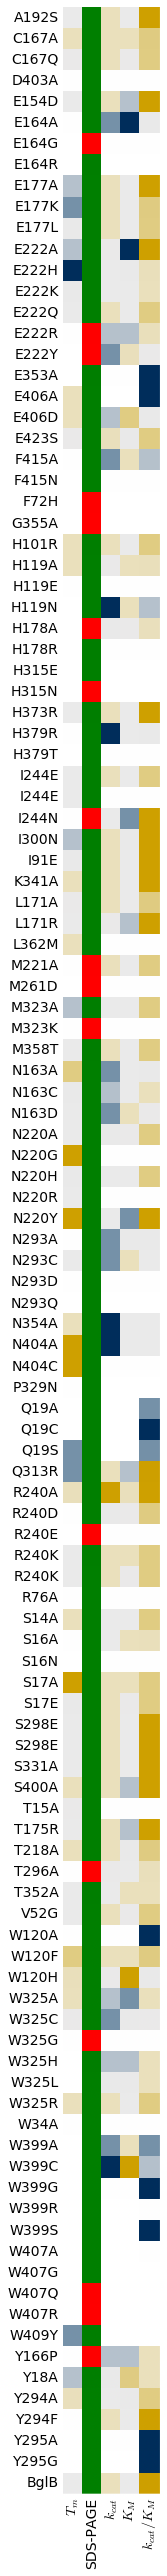

In [116]:
plt.figure( figsize=(18,36) ) 
plt.subplots_adjust(left=-11.8)
#plt.subplots_adjust(left=-11.46)
rc('axes', edgecolor='none')

font = { 'size': 14 }
rc('font', **font)

# recapitulate original heat map 

cmap, boundary_norm = mcolors.from_levels_and_colors(
    [ 
        -4.5,
        -3.5,
        -2.5,
        -1.5,
        0,
        1.5,
        2.5,
        3.5,
        4.5
    ], 
    [
        ( 0., .18, .36 ), 
        ( .46, .57, .66 ), 
        ( .71, .76, .80 ), 
        ( .92, .92, .92 ), 
        ( .92, .92, .92 ), 
        ( .92, .88, .74 ), 
        ( .88, .80, .51 ), 
        ( .81, .63, 0. )
    ]
)

cmap.set_bad( 'w', alpha=1 ) 

# new heat map for expression 

expr_map, expr_bound_norm = mcolors.from_levels_and_colors(
    [ -.5, .5, 1.5 ], 
    [ 'r', 'g' ], 
)

# heat map columns 

plt.subplot( 1, 6, 1 )
plt.imshow( df[ ['n_tm'] ], interpolation='none', cmap=cmap ) #cmap='bwr', origin='upper' ) 
plt.xticks( [ 0 ], [ '$T_m$' ], rotation='vertical' )
plt.yticks( range( len( df.index ) ), df.index )
plt.tick_params( length=0 ) 

plt.subplot( 1, 6, 2 )
plt.imshow( df[ ['n_expr'] ], interpolation='none', cmap=expr_map ) 
plt.tick_params( length=0 ) 
plt.xticks( [ 0 ], [ 'SDS-PAGE' ], rotation='vertical' ); plt.yticks( [] ) 

plt.subplot( 1, 6, 3 )
plt.imshow( df[ ['n_kcat'] ], interpolation='none', cmap=cmap ) 
plt.xticks( [ 0 ], [ '$k_{cat}$' ], rotation='vertical' ); plt.yticks( [] ) 
plt.tick_params( length=0 ) 

plt.subplot( 1, 6, 4 )
plt.imshow( df[ ['n_km'] ], interpolation='none', cmap=cmap ) 
plt.xticks( [ 0 ], [ '$K_M$' ], rotation='vertical' ); plt.yticks( [] ) 
plt.tick_params( length=0 ) 

plt.subplot( 1, 6, 5 )
plt.imshow( df[ ['n_kcatkm'] ], interpolation='none', cmap=cmap ) 
plt.xticks( [ 0 ], [ '$k_{cat}/K_M$' ], rotation='vertical' ); plt.yticks( [] ) 
plt.tick_params( length=0 ) 

#plt.subplot( 1, 6, 6 )
#plt.scatter( 0, 0 ) 
#plt.xticks( [ 0 ], [ '$k_{cat}/K_M$' ], rotation='vertical' ); plt.yticks( [] ) 
#plt.tick_params( length=0 ) 

plt.tight_layout()
#plt.savefig( 'fig2/plt_out.png', dpi=300 ) 
plt.show() 